### Importando as bibliotecas

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

### Carregando e analisando os dados

In [207]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [208]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [210]:
df.loc[df.duplicated(['customer_id'])]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


### Separando variáveis de interesse

In [211]:
df = df[['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']].copy()
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


### Gerando uma descrição rápida

In [212]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Visualizando a distribuição dos saldos

<Figure size 800x400 with 0 Axes>

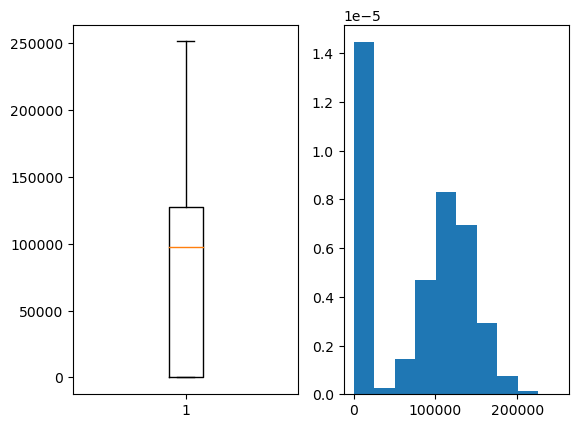

In [213]:
fig = plt.figure(figsize=(8, 4))
fig, (ax, ax1) = plt.subplots(1,2)
ax.boxplot(df.balance, showfliers=True)
ax1.hist(df.balance, density=True)
plt.show()

### Convertendo Gênero para 0 (Masculino) e 1 (Feminino)

In [214]:
df.gender.value_counts()
df['gender'] = df.gender.apply(lambda x: 0 if x == 'Male' else 1)

### Visualizando as correlações entre as variáveis

In [215]:
correlation_matrix = df.corr()
correlation_matrix

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
gender,0.002857,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512
age,-0.003965,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.027094,0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


### Separando as variáveis independentes (x) da variável dependente (y)

In [216]:
x = df.iloc[:, :-1].values
y = df.churn.values

### Padronizando os valores de X

In [217]:
std_scl = StandardScaler()
x_std = std_scl.fit_transform(x)
x_std

array([[-0.32622142,  1.09598752,  0.29351742, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.09598752,  0.19816383, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  1.09598752,  0.29351742, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839,  1.09598752, -0.27860412, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526, -0.91241915,  0.29351742, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078,  1.09598752, -1.04143285, ...,  0.64609167,
        -1.03067011, -1.07636976]])

### Separando dados para treino (70%) e teste (20%)

In [218]:
xtrain, xtest, ytrain, ytest = train_test_split(x_std, y, train_size=0.7, random_state=80)

### Criando e treinando modelo

In [219]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

### Fazendo previsões com dados de teste

In [220]:
ypred = model.predict(xtest)
ypred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Visualizando as métricas

In [221]:
model.score(xtrain, ytrain)

0.8071428571428572

In [222]:
mean_squared_error(ytest, ypred)

0.19833333333333333

In [223]:
confusion_matrix(ytest, ypred)

array([[2299,   96],
       [ 499,  106]], dtype=int64)

### Valores reais VS valores previstos

In [224]:
pd.DataFrame({'y true': ytest, 'y pred': ypred}).head(20)

,y true,y pred
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
